### 3. Final project - preliminary analysis

Make an exploratory plot using the data that you plan to work with in your final project. The submission format is open-ended. You can upload your analysis as a notebook, or upload an image to this repository. The goal is to start working with your own data (or publicly available data relevant to your research interests) in Python.

The full project assignment, with timeline, can be found at https://github.com/mlmldata24/Final-Project-Assignment

Describe your plot in a short paragraph below.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

url = "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO891_hindcast.nc"

ds = xr.open_dataset(url)



In [27]:
#Creating a function for south side of the harbor mouth so dont have to keep using the urls
def south_side():
    urls = [
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO886_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO887_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO888_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO889_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO890_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO891_hindcast.nc"
         ]

    Sdataset = []
    for url in urls:
        try:
            ds = xr.open_dataset(url)
           
            _ = ds.variables
            Sdataset.append(ds)
        except Exception as e:
            print(f"Failed to load dataset from {url}: {e}")
            Sdataset.append(None)
    return Sdataset

In [31]:
#Creating a function for north side of the harbor mouth so dont have to keep using the urls
def north_side():
    urls = [
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO896_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO897_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO898_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO899_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO917_hindcast.nc",
        "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO921_hindcast.nc"
    ]
    Ndataset = []
    for url in urls:
        try:
            ds = xr.open_dataset(url)
            _ = ds.variables
            Ndataset.append(ds)
        except Exception as e:
            print(f"Failed to load dataset from {url}: {e}")
            Ndataset.append(None)
    return Ndataset

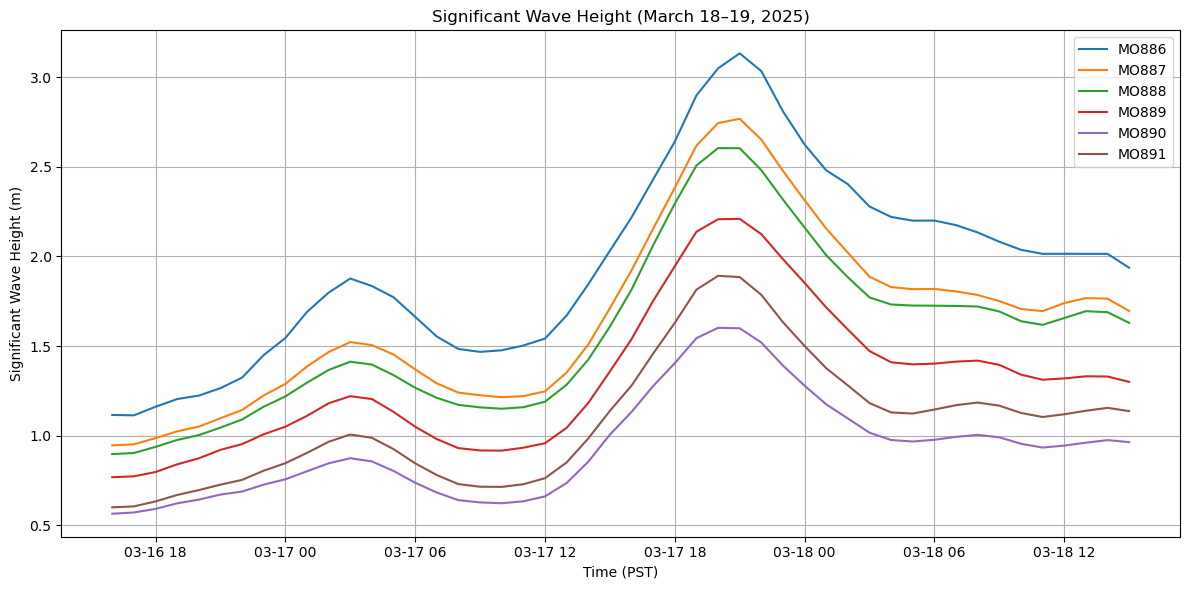

In [33]:
#visualizing how southern canyon tributaries affect wave height (Hs vs Time)


def plot_S_Hs():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']
    Sdataset = south_side()

    plt.figure(figsize=(12, 6))

    for ds, label in zip(Sdataset, locations):
        if ds is None:
            print(f"Skipping due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            time = ds['waveTime']

            # Apply time filter
            time_mask = (time >= start_date) & (time <= end_date)
            hs_filtered = hs.sel(waveTime=time_mask)
            time_filtered = time[time_mask]

            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            plt.plot(time_pst, hs_filtered, label=label)

        except Exception as e:
            print(f"Error processing ")
            continue

    plt.title("Significant Wave Height (March 18–19, 2025)")
    plt.xlabel("Time (PST)")
    plt.ylabel("Significant Wave Height (m)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_S_Hs()

In [ ]:
#visualizing how northern canyon tributaries affect wave height (Hs vs Time)


def plot_N_Hs():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO896', 'MO897', 'MO898', 'MO899', 'MO917']
    Ndataset = north_side()

    plt.figure(figsize=(12, 6))

    for ds, label in zip(Ndataset, locations):
        if ds is None:
            print(f"Skipping due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            time = ds['waveTime']

            # Apply time filter
            time_mask = (time >= start_date) & (time <= end_date)
            hs_filtered = hs.sel(waveTime=time_mask)
            time_filtered = time[time_mask]

            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            plt.plot(time_pst, hs_filtered, label=label)

        except Exception as e:
            print(f"Error processing")
            continue

    plt.title("Significant Wave Height (March 18–19, 2025)")
    plt.xlabel("Time")
    plt.ylabel("Significant Wave Height (m)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_N_Hs()

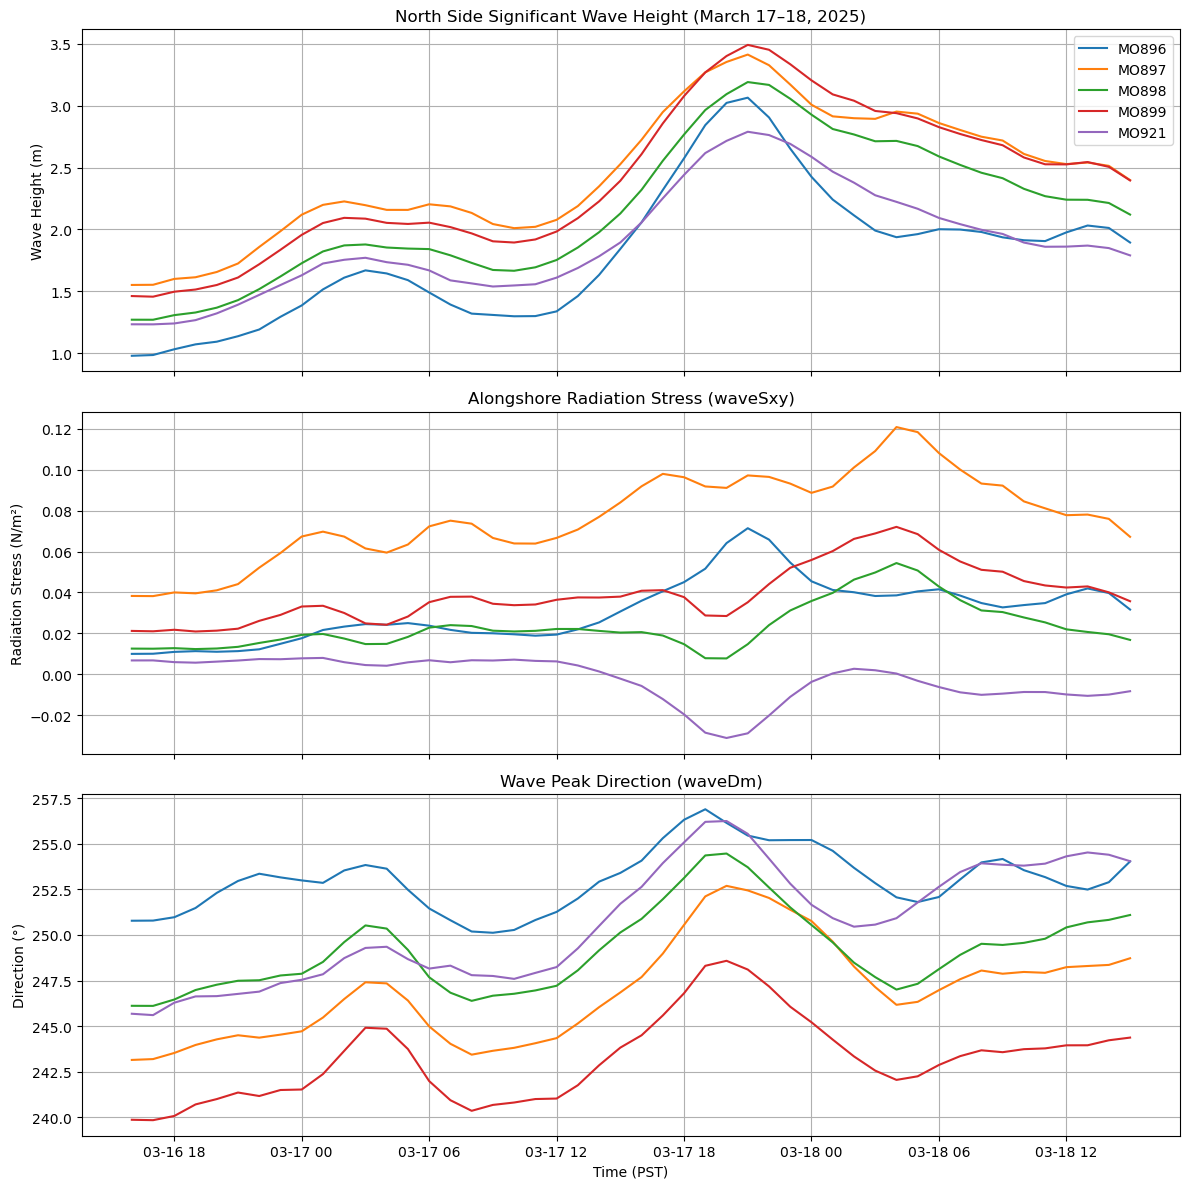

In [38]:
#Now adding Alongshore radiation stress (WaveSxy) to the mix
def plot_N_Hs_Sxy_Dm():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO896', 'MO897', 'MO898', 'MO899', 'MO921']
    Ndataset = north_side()

    # Create 3 subplots for Hs, Sxy, and Dm
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    for ds, label in zip(Ndataset, locations):
        if ds is None:
            print(f"Skipping {label} due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            sxy = ds['waveSxy']
            dm = ds['waveDm']
            time = ds['waveTime']

            # Apply time filter
            time_mask = (time >= start_date) & (time <= end_date)
            time_filtered = time[time_mask]
            hs_filtered = hs.sel(waveTime=time_mask)
            sxy_filtered = sxy.sel(waveTime=time_mask)
            dm_filtered = dm.sel(waveTime=time_mask)

            # Convert time to PST
            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            # Plot wave height
            axes[0].plot(time_pst, hs_filtered, label=label)

            # Plot alongshore radiation stress
            axes[1].plot(time_pst, sxy_filtered, label=label)

            # Plot wave peak direction
            axes[2].plot(time_pst, dm_filtered, label=label)

        except Exception as e:
            print(f"Error processing {label}: {e}")
            continue

    # Subplot formatting
    axes[0].set_title("North Side Significant Wave Height (March 17–18, 2025)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].grid(True)

    axes[2].set_title("Wave Peak Direction (waveDm)")
    axes[2].set_ylabel("Direction (°)")
    axes[2].set_xlabel("Time (PST)")
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

# Run the function
plot_N_Hs_Sxy_Dm()


In [ ]:
#Running a PAired T test on MO921 vs MO897 (North side)
from scipy.stats import ttest_rel

start = np.datetime64("2024-12-01T00:00:00")
end = np.datetime64("2025-04-18T23:59:59")

# Load datasets (assuming north_side() returns a list where index 1 = MO897 and 4 = MO921)
datasets = north_side()
ds897 = datasets[2]  # MO897
ds921 = datasets[5]  # MO921

# Helper to extract and align data
def get_series(ds, var):
    data = ds[var]
    time = ds['waveTime']
    mask = (time >= start) & (time <= end)
    values = data.sel(waveTime=mask).values
    times = pd.to_datetime(time[mask].values) - pd.Timedelta(hours=8)
    return pd.Series(values, index=times)

# Extract waveSxy
sxy_897 = get_series(ds897, 'waveSxy')
sxy_921 = get_series(ds921, 'waveSxy')

# Extract waveDm
dm_897 = get_series(ds897, 'waveDm')
dm_921 = get_series(ds921, 'waveDm')

# Align data by timestamp (inner join)
sxy_df = pd.concat([sxy_897, sxy_921], axis=1, keys=['MO897', 'MO921']).dropna()
dm_df = pd.concat([dm_897, dm_921], axis=1, keys=['MO897', 'MO921']).dropna()

# Run paired t-tests
t_sxy, p_sxy = ttest_rel(sxy_df['MO897'], sxy_df['MO921'])
t_dm, p_dm = ttest_rel(dm_df['MO897'], dm_df['MO921'])

# Print results 
print("Paired t-test results:")

print("waveSxy (MO897 vs MO921)")
print("T-statistic:", t_sxy)
print("P-value:", p_sxy)
print("Number of paired samples:", len(sxy_df))
print()

print("waveDm (MO897 vs MO921)")
print("T-statistic:", t_dm)
print("P-value:", p_dm)
print("Number of paired samples:", len(dm_df))



In [ ]:
def plot_S_Hs_Sxy():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']
    Sdataset = south_side()

    # Set up two subplots: one for Hs and one for Sxy
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    for ds, label in zip(Sdataset, locations):
        if ds is None:
            print(f"Skipping {label} due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            sxy = ds['waveSxy']
            time = ds['waveTime']

            # Apply time mask
            time_mask = (time >= start_date) & (time <= end_date)
            hs_filtered = hs.sel(waveTime=time_mask)
            sxy_filtered = sxy.sel(waveTime=time_mask)
            time_filtered = time[time_mask]

            # Convert to PST
            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            # Plot wave height
            axes[0].plot(time_pst, hs_filtered, label=label)

            # Plot radiation stress
            axes[1].plot(time_pst, sxy_filtered, label=label)

        except Exception as e:
            print(f"Error processing {label}: {e}")
            continue

    
    axes[0].set_title("South Side Significant Wave Height (March 17–18, 2025)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].set_xlabel("Time (PST)")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_S_Hs_Sxy()

In [ ]:
#Now adding Alongshore radiation stress (WaveSxy) to the mix
def plot_N_Hs_Sxy_Dm():
    # Define time range
    start_date = np.datetime64("2025-03-17T00:00:00")
    end_date = np.datetime64("2025-03-18T23:59:59")

    locations = ['MO896', 'MO897', 'MO898', 'MO899', 'MO921']
    Ndataset = north_side()

    # Create 3 subplots for Hs, Sxy, and Dm
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    for ds, label in zip(Ndataset, locations):
        if ds is None:
            print(f"Skipping {label} due to loading error.")
            continue
        try:
            hs = ds['waveHs']
            sxy = ds['waveSxy']
            dm = ds['waveDm']
            time = ds['waveTime']

            # Apply time filter
            time_mask = (time >= start_date) & (time <= end_date)
            time_filtered = time[time_mask]
            hs_filtered = hs.sel(waveTime=time_mask)
            sxy_filtered = sxy.sel(waveTime=time_mask)
            dm_filtered = dm.sel(waveTime=time_mask)

            # Convert time to PST
            time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

            # Plot wave height
            axes[0].plot(time_pst, hs_filtered, label=label)

            # Plot alongshore radiation stress
            axes[1].plot(time_pst, sxy_filtered, label=label)

            # Plot wave peak direction
            axes[2].plot(time_pst, dm_filtered, label=label)

        except Exception as e:
            print(f"Error processing {label}: {e}")
            continue

    # Subplot formatting
    axes[0].set_title("North Side Significant Wave Height (March 17–18, 2025)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].grid(True)

    axes[2].set_title("Wave Peak Direction (waveDm)")
    axes[2].set_ylabel("Direction (°)")
    axes[2].set_xlabel("Time (PST)")
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

# Run the function
plot_N_Hs_Sxy_Dm()


In [ ]:
from itertools import cycle

def plot_all_Hs_Sxy():
    # Define time range
    start_date = np.datetime64("2024-12-12T00:00:00")
    end_date = np.datetime64("2024-12-15T23:59:59")

    north_locs = ['MO896', 'MO897', 'MO898', 'MO899']
    south_locs = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']

    north_ds = north_side()
    south_ds = south_side()

    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    
    north_color = 'blue'
    south_color = 'orange'

    def plot_group(datasets, labels, prefix, color):
        for ds, label in zip(datasets, labels):
            if ds is None:
                print(f"Skipping {label} due to loading error.")
                continue
            try:
                hs = ds['waveHs']
                sxy = ds['waveSxy']
                time = ds['waveTime']

                # Filter time
                time_mask = (time >= start_date) & (time <= end_date)
                time_filtered = time[time_mask]
                hs_filtered = hs.sel(waveTime=time_mask)
                sxy_filtered = sxy.sel(waveTime=time_mask)

                # Convert to PST
                time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

                # Plot wave height and stress using the group color
                axes[0].plot(time_pst, hs_filtered, label=f"{prefix} {label}", color=color)
                axes[1].plot(time_pst, sxy_filtered, label=f"{prefix} {label}", color=color)

            except Exception as e:
                print(f"Error processing {label}: {e}")
                continue

    # Plot both groups with distinct colors
    plot_group(north_ds, north_locs, "North", north_color)
    plot_group(south_ds, south_locs, "South", south_color)

    
    axes[0].set_title("Significant Wave Height (December 12 - 15, 2025, PST)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].set_xlabel("Time (PST)")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_all_Hs_Sxy()

In [ ]:
def plot_all_Hs_Sxy():
    # Define time range
    start_date = np.datetime64("2024-05-10T00:00:00")
    end_date = np.datetime64("2025-05-01T23:59:59")

    north_locs = ['MO896', 'MO897', 'MO898', 'MO899']
    south_locs = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']

    north_ds = north_side()
    south_ds = south_side()

    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    
    north_color = 'blue'
    south_color = 'orange'

    def plot_group(datasets, labels, prefix, color):
        for ds, label in zip(datasets, labels):
            if ds is None:
                print(f"Skipping {label} due to loading error.")
                continue
            try:
                hs = ds['waveHs']
                sxy = ds['waveSxy']
                time = ds['waveTime']

                # Filter time
                time_mask = (time >= start_date) & (time <= end_date)
                time_filtered = time[time_mask]
                hs_filtered = hs.sel(waveTime=time_mask)
                sxy_filtered = sxy.sel(waveTime=time_mask)

                # Convert to PST
                time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

                # Plot wave height and stress using the group color
                axes[0].plot(time_pst, hs_filtered, label=f"{prefix} {label}", color=color)
                axes[1].plot(time_pst, sxy_filtered, label=f"{prefix} {label}", color=color)

            except Exception as e:
                print(f"Error processing {label}: {e}")
                continue

    # Plot both groups with distinct colors
    plot_group(north_ds, north_locs, "North", north_color)
    plot_group(south_ds, south_locs, "South", south_color)

    
    axes[0].set_title("Significant Wave Height (May 10th, 2024 – May 11th, 2025, PST)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].set_xlabel("Time (PST)")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_all_Hs_Sxy()

In [ ]:
def plot_all_Hs_Sxy_Dm():
    # Define time range
    start_date = np.datetime64("2025-02-13T00:00:00")
    end_date = np.datetime64("2025-02-15T23:59:59")

    north_locs = ['MO896', 'MO897', 'MO898', 'MO899']
    south_locs = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']

    north_ds = north_side()
    south_ds = south_side()

    # Create 3 subplots: Hs, Sxy, and Dm
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

    north_color = 'blue'
    south_color = 'orange'

    def plot_group(datasets, labels, prefix, color):
        for ds, label in zip(datasets, labels):
            if ds is None:
                print(f"Skipping {label} due to loading error.")
                continue
            try:
                hs = ds['waveHs']
                sxy = ds['waveSxy']
                dm = ds['waveDm']
                time = ds['waveTime']

                # Filter time
                time_mask = (time >= start_date) & (time <= end_date)
                time_filtered = time[time_mask]
                hs_filtered = hs.sel(waveTime=time_mask)
                sxy_filtered = sxy.sel(waveTime=time_mask)
                dm_filtered = dm.sel(waveTime=time_mask)

                # Convert to PST
                time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

                # Plot wave height, stress, and direction
                axes[0].plot(time_pst, hs_filtered, label=f"{prefix} {label}", color=color)
                axes[1].plot(time_pst, sxy_filtered, label=f"{prefix} {label}", color=color)
                axes[2].plot(time_pst, dm_filtered, label=f"{prefix} {label}", color=color)

            except Exception as e:
                print(f"Error processing {label}: {e}")
                continue

    # Plot both north and south datasets
    plot_group(north_ds, north_locs, "North", north_color)
    plot_group(south_ds, south_locs, "South", south_color)

    # Formatting
    axes[0].set_title("Significant Wave Height (February 13–15, 2025, PST)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].grid(True)

    axes[2].set_title("Wave Peak Direction (waveDm)")
    axes[2].set_ylabel("Direction (°)")
    axes[2].set_xlabel("Time (PST)")
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

# Run the updated function
plot_all_Hs_Sxy_Dm()


In [ ]:
def plot_all_Hs_Sxy_Dm():
    # Define time range
    start_date = np.datetime64("2024-12-12T00:00:00")
    end_date = np.datetime64("2024-12-15T23:59:59")

    north_locs = ['MO896', 'MO897', 'MO898', 'MO899']
    south_locs = ['MO886', 'MO887', 'MO888', 'MO889', 'MO890', 'MO891']

    north_ds = north_side()
    south_ds = south_side()

    # Set up 3 vertically stacked subplots sharing the x-axis
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

    north_color = 'blue'
    south_color = 'orange'

    def plot_group(datasets, labels, prefix, color):
        for ds, label in zip(datasets, labels):
            if ds is None:
                print(f"Skipping {label} due to loading error.")
                continue
            try:
                hs = ds['waveHs']
                sxy = ds['waveSxy']
                dm = ds['waveDm']
                time = ds['waveTime']

                # Filter time
                time_mask = (time >= start_date) & (time <= end_date)
                time_filtered = time[time_mask]
                hs_filtered = hs.sel(waveTime=time_mask)
                sxy_filtered = sxy.sel(waveTime=time_mask)
                dm_filtered = dm.sel(waveTime=time_mask)

                # Convert to PST
                time_pst = pd.to_datetime(time_filtered.values) - pd.Timedelta(hours=8)

                # Plot wave height, radiation stress, and direction
                axes[0].plot(time_pst, hs_filtered, label=f"{prefix} {label}", color=color)
                axes[1].plot(time_pst, sxy_filtered, label=f"{prefix} {label}", color=color)
                axes[2].plot(time_pst, dm_filtered, label=f"{prefix} {label}", color=color)

            except Exception as e:
                print(f"Error processing {label}: {e}")
                continue

    # Plot both groups
    plot_group(north_ds, north_locs, "North", north_color)
    plot_group(south_ds, south_locs, "South", south_color)

    # Axis formatting
    axes[0].set_title("Significant Wave Height (Dec 12–15, 2024, PST)")
    axes[0].set_ylabel("Wave Height (m)")
    axes[0].legend()
    axes[0].grid(True)

    axes[1].set_title("Alongshore Radiation Stress (waveSxy)")
    axes[1].set_ylabel("Radiation Stress (N/m²)")
    axes[1].grid(True)

    axes[2].set_title("Wave Peak Direction (waveDm)")
    axes[2].set_ylabel("Direction (°)")
    axes[2].set_xlabel("Time (PST)")
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

# Run the updated function
plot_all_Hs_Sxy_Dm()


Failed to load http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO886_hindcast.nc: "No variable named 'longitude'. Variables on the dataset include ['waveTime', 'waveTimeBounds', 'waveFlagPrimary', 'waveFlagSecondary', 'waveHs', ..., 'waveA1Value', 'waveB1Value', 'waveA2Value', 'waveB2Value', 'waveModelBinInputCoverage']"
Failed to load http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO887_hindcast.nc: "No variable named 'longitude'. Variables on the dataset include ['waveTime', 'waveTimeBounds', 'waveFlagPrimary', 'waveFlagSecondary', 'waveHs', ..., 'waveA1Value', 'waveB1Value', 'waveA2Value', 'waveB2Value', 'waveModelBinInputCoverage']"
Failed to load http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO888_hindcast.nc: "No variable named 'longitude'. Variables on the dataset include ['waveTime', 'waveTimeBounds', 'waveFlagPrimary', 'waveFlagSecondary', 'waveHs', ..., 'waveA1Value', 'waveB1Value', 'waveA2Value', 'waveB2Value'

/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241:

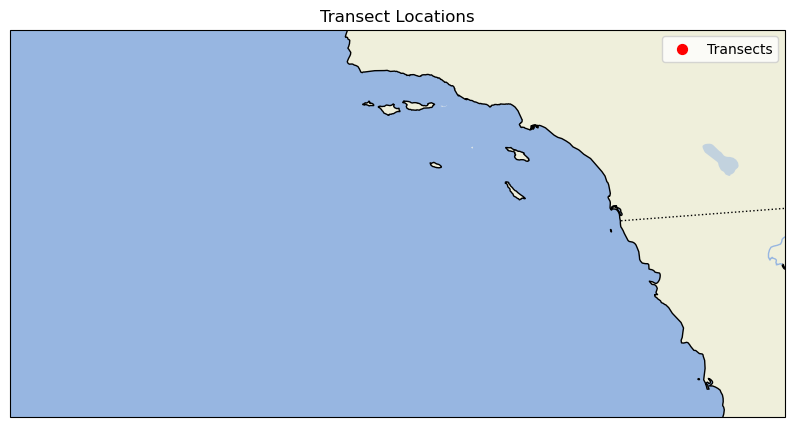

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of NetCDF URLs
urls = [
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO886_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO887_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO888_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO889_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO890_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO891_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO896_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO897_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO898_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO899_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO917_hindcast.nc",
    "http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/model/MOP_alongshore/MO921_hindcast.nc"
]

# Extract coordinates
lons = []
lats = []

for url in urls:
    try:
        ds = xr.open_dataset(url)
        # Use `.mean()` in case it's a 2D transect
        lon = float(ds['longitude'].mean().values)
        lat = float(ds['latitude'].mean().values)
        lons.append(lon)
        lats.append(lat)
    except Exception as e:
        print(f"Failed to load {url}: {e}")

# Plotting with Cartopy
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Transect Locations")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Scatter the transect points
ax.scatter(lons, lats, color='red', marker='o', s=50, transform=ccrs.PlateCarree(), label='Transects')
ax.legend()

# Optional: zoom in to a region (e.g., Southern California)
ax.set_extent([-125, -115, 30, 35], crs=ccrs.PlateCarree())

plt.show()
